In [ ]:
import pandas as pd

# ============================
# === Load and normalize date ===
# ============================

# Load stock data
stock_df = pd.read_csv('../yfinance_data/AAPL_historical_data.csv', parse_dates=['Date'])
stock_df.rename(columns={'Date': 'date'}, inplace=True)

# Load news data
news_df = pd.read_csv('../yfinance_data/raw_analyst_ratings.csv')
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')



# Preview
print("Stock Data:")
print(stock_df.head())

print("\nNews Data:")
print(news_df.head())


Stock Data:
        date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  

News Data:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Sess

In [ ]:
import pandas as pd

# Load both CSVs into different variables
stock_df = pd.read_csv("../yfinance_data/AAPL_historical_data.csv")
news_df = pd.read_csv("../yfinance_data/raw_analyst_ratings.csv")

# Show first few rows of each
print("Stock Data:\n", stock_df.head())
print("\nNews Data:\n", news_df.head())



Stock Data:
          Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  

News Data:
    Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-

In [ ]:
# ===========================
# === Display Date range and get overlap period===
# ===========================

# Step 2: Drop rows with invalid dates (optional but recommended)
stock_df = stock_df.dropna(subset=['Date'])
news_df = news_df.dropna(subset=['date'])

# Step 3: Display date ranges
print("\nStock date range:", stock_df['Date'].min().date(), "to", stock_df['Date'].max().date())
print("News date range:", news_df['date'].min().date(), "to", news_df['date'].max().date())

# Step 4: Get overlap period
news_df['date'] = news_df['date'].dt.tz_localize(None)
start_date = max(stock_df['Date'].min(), news_df['date'].min()).date()
end_date = min(stock_df['Date'].max(), news_df['date'].max()).date()

print("Overlap period:", start_date, "to", end_date)


Stock date range: 1980-12-12 to 2024-07-30
News date range: 2011-04-27 to 2020-06-11
Overlap period: 2011-04-27 to 2020-06-11


In [ ]:
# ===========================
# === Sentiment Analysis===
# ===========================

from textblob import TextBlob
# Define function
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
news_df['sentiment'] = news_df['headline'].apply(get_sentiment)

# Categorize sentiment
def sentiment_label(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

news_df['sentiment_label'] = news_df['sentiment'].apply(sentiment_label)

# Display results
print(news_df[['headline', 'sentiment', 'sentiment_label']].head(10))

                                            headline  sentiment  \
0            Stocks That Hit 52-Week Highs On Friday       0.00   
1         Stocks That Hit 52-Week Highs On Wednesday       0.00   
2                      71 Biggest Movers From Friday       0.00   
3       46 Stocks Moving In Friday's Mid-Day Session       0.00   
4  B of A Securities Maintains Neutral on Agilent...       0.00   
5  CFRA Maintains Hold on Agilent Technologies, L...       0.00   
6  UBS Maintains Neutral on Agilent Technologies,...       0.00   
7  Agilent Technologies shares are trading higher...       0.25   
8  Wells Fargo Maintains Overweight on Agilent Te...       0.00   
9         10 Biggest Price Target Changes For Friday       0.00   

  sentiment_label  
0         Neutral  
1         Neutral  
2         Neutral  
3         Neutral  
4         Neutral  
5         Neutral  
6         Neutral  
7        Positive  
8         Neutral  
9         Neutral  


In [ ]:
# ===========================
# === ACompute Daily Stock Returns===
# ===========================

# Ensure the stock data is sorted by date
stock_df = stock_df.sort_values('Date')

# Calculate daily percentage change in 'Close' prices
stock_df['daily_return'] = stock_df['Close'].pct_change()

# Show first few rows to verify
print(stock_df[['Date', 'Close', 'daily_return']].head())


         Date     Close  daily_return
0  1980-12-12  0.128348           NaN
1  1980-12-15  0.121652     -0.052171
2  1980-12-16  0.112723     -0.073398
3  1980-12-17  0.115513      0.024751
4  1980-12-18  0.118862      0.028992


In [ ]:
# ===========================
# === Aggregate Sentiment Scores by Date===
# ===========================

from textblob import TextBlob

# If not yet done: compute sentiment polarity
news_df['sentiment'] = news_df['headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Group average sentiment per day
daily_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.columns = ['Date', 'daily_sentiment']


In [ ]:
# ===========================
# === Merge the Sentiment and Stock Returns===
# ===========================

# Merge both DataFrames on 'Date'
merged_df = pd.merge(stock_df, daily_sentiment, on='Date', how='inner')

# Show sample of merged data
print(merged_df[['Date', 'daily_return', 'daily_sentiment']].head())


Empty DataFrame
Columns: [Date, daily_return, daily_sentiment]
Index: []


In [ ]:
# ===========================
# === Correlation Analysis===
# ===========================

# Drop NA values (from pct_change and sentiment)
merged_df = merged_df.dropna(subset=['daily_return', 'daily_sentiment'])

# Compute correlation
correlation = merged_df['daily_return'].corr(merged_df['daily_sentiment'])
print(f"Correlation between stock returns and sentiment: {correlation:.4f}")


Correlation between stock returns and sentiment: nan


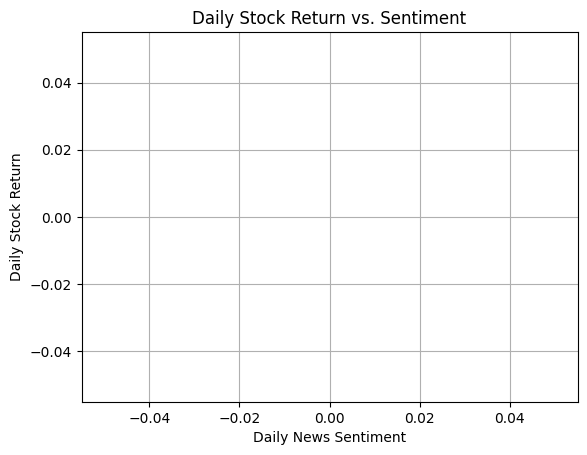

In [ ]:
# ===========================
# === Visualize the Relationship ===
# ===========================

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=merged_df, x='daily_sentiment', y='daily_return')
plt.title("Daily Stock Return vs. Sentiment")
plt.xlabel("Daily News Sentiment")
plt.ylabel("Daily Stock Return")
plt.grid(True)
plt.show()


In [30]:
correlation = merged_df['daily_return'].corr(merged_df['daily_sentiment'])


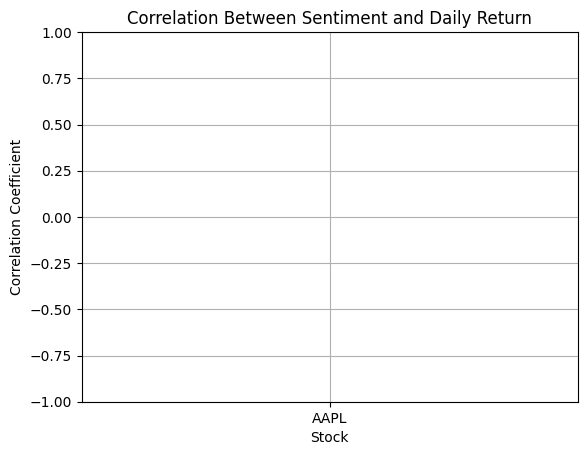

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a simple DataFrame with one row
correlation_df = pd.DataFrame({
    'stock': ['AAPL'],
    'correlation': [correlation]
})

# Plot
sns.barplot(x='stock', y='correlation', data=correlation_df)
plt.title("Correlation Between Sentiment and Daily Return")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Stock")
plt.ylim(-1, 1)  # correlation ranges from -1 to 1
plt.grid(True)
plt.show()


In [40]:
# Drop time info and keep only the date
news_df['date_only'] = pd.to_datetime(news_df['date']).dt.date

# Group by date and calculate average sentiment
daily_sentiment = news_df.groupby('date_only')['sentiment'].mean().reset_index()
daily_sentiment.rename(columns={'date_only': 'Date', 'sentiment': 'avg_sentiment'}, inplace=True)

# Preview
print(daily_sentiment.head())

         Date  avg_sentiment
0  2011-04-27       0.000000
1  2011-04-28       0.068182
2  2011-04-29       0.166667
3  2011-04-30       0.500000
4  2011-05-01       0.000000


In [50]:
# Assuming you have stock_df and daily_sentiment already prepared

# Remove timezone from stock_df 'Date'
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.tz_localize(None)

# Remove timezone from daily_sentiment 'Date'
daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date']).dt.tz_localize(None)

# Prepare stock_all DataFrame
stock_all = stock_df[['Date', 'stock', 'daily_return']]

# Merge on 'Date' and 'stock'
merged_df = pd.merge(stock_all, daily_sentiment, on=['Date', 'stock'], how='inner')

print(merged_df[['Date', 'stock', 'daily_return', 'avg_sentiment']].head())


Empty DataFrame
Columns: [Date, stock, daily_return, avg_sentiment]
Index: []


In [48]:
# Merge on both Date and stock
merged_df = pd.merge(stock_all, daily_sentiment, on=['Date', 'stock'], how='inner')

# Check columns after merge
print(merged_df.columns)

# Display the desired columns
print(merged_df[['Date', 'stock', 'daily_return', 'avg_sentiment']].head())


Index(['Date', 'stock', 'daily_return', 'avg_sentiment'], dtype='object')
Empty DataFrame
Columns: [Date, stock, daily_return, avg_sentiment]
Index: []


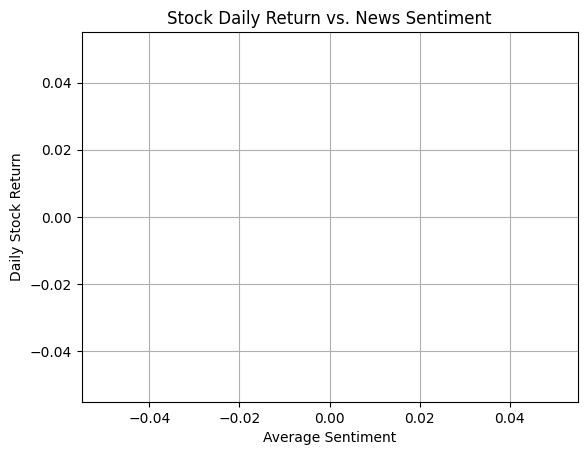

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(data=merged_df, x='avg_sentiment', y='daily_return', alpha=0.5)
plt.title('Stock Daily Return vs. News Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Daily Stock Return')
plt.grid(True)
plt.show()

In [33]:
import os

# List all files in the directory
files = os.listdir("../yfinance_data")

# Extract stock tickers from files that match the pattern *_historical_data.csv
stock_list = [f.split('_')[0] for f in files if f.endswith("_historical_data.csv")]

print("Detected stock tickers:", stock_list)


Detected stock tickers: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']


In [37]:
import pandas as pd

# Load the news data once
news_df = pd.read_csv("../yfinance_data/raw_analyst_ratings.csv")
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')
news_df.dropna(subset=['date'], inplace=True)

# If sentiment is not calculated yet, use this (make sure TextBlob is installed)
from textblob import TextBlob
news_df['sentiment'] = news_df['headline'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)


correlations = []
stock_list = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

for stock in stock_list:
    try:
        # Load stock data
        stock_df = pd.read_csv(f"../yfinance_data/{stock}_historical_data.csv")
        stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce')
        stock_df.dropna(subset=['Date', 'Close'], inplace=True)

        # Calculate daily returns
        stock_df['return'] = stock_df['Close'].pct_change()
        stock_df['date'] = stock_df['Date'].dt.date

        # Merge with news sentiment on date
        merged_df = pd.merge(stock_df, news_df, left_on='date', right_on=news_df['date'].dt.date)
        
        # Drop rows with missing sentiment or returns
        merged_df.dropna(subset=['return', 'sentiment'], inplace=True)

        # Compute correlation
        corr = merged_df['return'].corr(merged_df['sentiment'])

        correlations.append({'stock': stock, 'correlation': corr})
    except Exception as e:
        print(f"Error processing {stock}: {e}")

# Create DataFrame
correlations = pd.DataFrame(correlations)
print(correlations)


  stock  correlation
0  AAPL     0.025741
1  AMZN     0.008853
2  GOOG     0.028742
3  META     0.021316
4  MSFT     0.019517
5  NVDA     0.003821
6  TSLA     0.010085


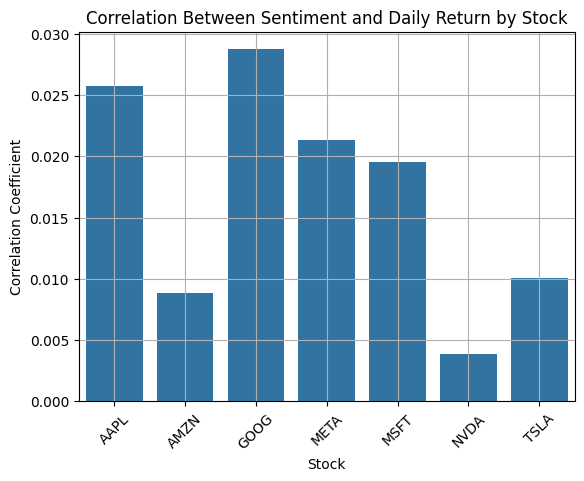

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='stock', y='correlation', data=correlations)
plt.title("Correlation Between Sentiment and Daily Return by Stock")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Stock")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()